## Aprendizado Não Supervisionado - Agrupamento de Dados

### K-means

* Base de dados Iris, muito comum para exemplos
  * Utilização de apenas dois atributos
* Utilização do método Elbow para escolhar do melhor número de clusters
* Implementar o algoritmo K-means do zero. Deve ser apresentado sua forma mais simples, sem nenhuma otimização. Sugere-se que  seja criada uma função que receba como parâmetros o número de clusters `k`, o conjunto de dados em formato Numpy `X`, e um parâmetro `random_state`, retornando os centróides finais e os labels. Os centróides devem ser um Numpy array e os labels devem ser uma lista, onde cada elemento é um inteiro representando o cluster.

```python
def do_kmeans_clustering(k, X, random_state):
  # seu código aqui
  return centroids, final_clusters
```


### Importações

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import io
import requests

from sklearn.cluster import KMeans
from sklearn import datasets

%matplotlib inline

plt.rcParams['figure.figsize'] = (14, 8)

sns.set(font_scale=2)


### Carregar a base de dados e inspecionar algumas informações

In [ ]:
# Download: https://drive.google.com/file/d/1mxNhE-89nm22J6Hz84c8egJ4ouwz2aK4/view?usp=sharing
df = pd.read_csv('/content/iris.data')
print(df.shape)
df.head()

(150, 5)


,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
# Neste exemplo, vamos usar apenas duas colunas (petal length e petal width)
df_train = df[df.columns[2:4]]
df_labels = df[df.columns[4]]

df_train.head()

,petal length,petal width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


## Cálculos das métricas


In [ ]:
def calculate_wcss(df):
    from sklearn.cluster import KMeans
    wcss = []
    for n in range(1, 13):
        kmeans = KMeans(n_clusters=n)
        kmeans.fit(X=df)
        wcss.append(kmeans.inertia_)

    return wcss

In [ ]:
# NAO EXCLUIR

sum_of_squares = calculate_wcss(df_train)

### Método elbow

In [ ]:
%%time

min_clusters = 1
max_clusters = int(np.sqrt(len(df)))

clusters_range = range(min_clusters, max_clusters + 1)

inertias = []

for k in clusters_range:
    model = KMeans(n_clusters=k)
    model.fit(df_train)
    
    cur_inertia = model.inertia_
    inertias.append(cur_inertia)

CPU times: user 446 ms, sys: 5.55 ms, total: 452 ms
Wall time: 454 ms


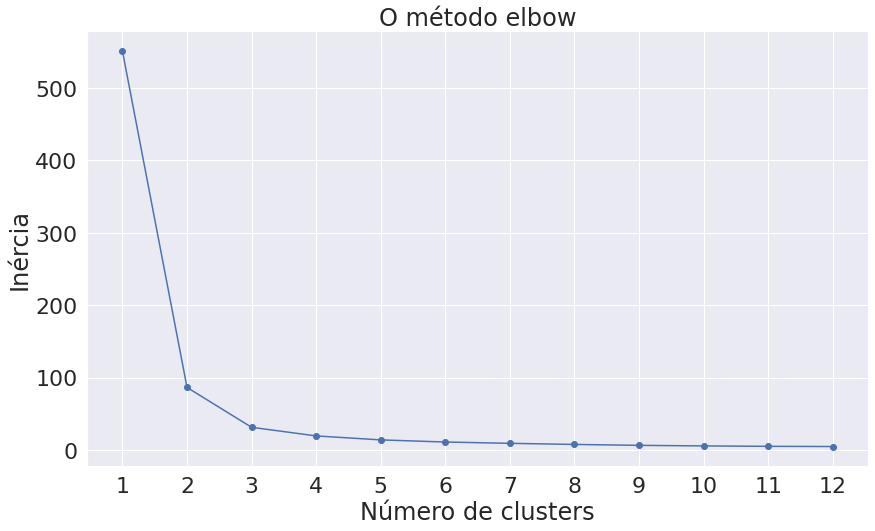

In [ ]:
_ = plt.plot(clusters_range, inertias, '-o')
_ = plt.title('O método elbow')
_ = plt.xlabel('Número de clusters')
_ = plt.ylabel('Inércia')
_ = plt.xticks(clusters_range)
plt.show()

# Gráfico da Distância entre os pontos


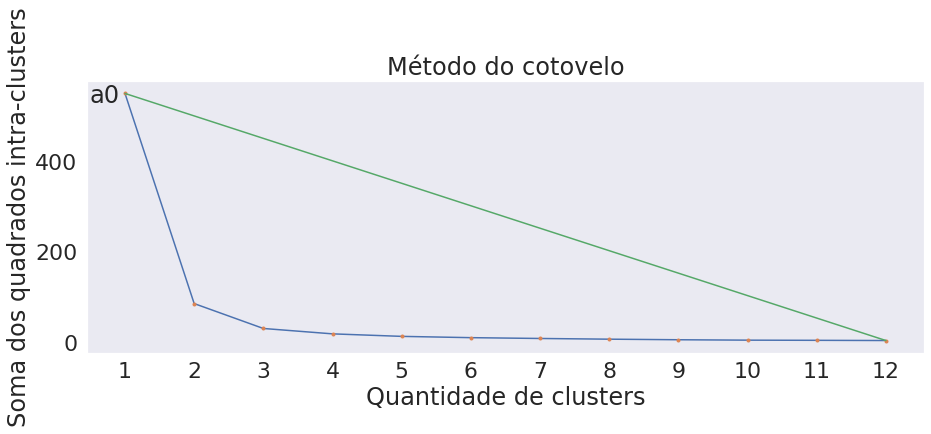

In [ ]:
plt.figure(figsize=(15,5))
plt.title('Método do cotovelo')
plt.xlabel('Quantidade de clusters')
plt.ylabel('Soma dos quadrados intra-clusters')
plt.grid()
plt.xticks(clusters_range)
plt.plot(clusters_range, sum_of_squares) # pontos laranjas
plt.plot(clusters_range, sum_of_squares, '.') # linha azul

y2 = sum_of_squares[len(sum_of_squares)-1]
y1 = sum_of_squares[0]

plt.plot([max_clusters, min_clusters], [y2,y1]) # linha verde

for x,y in zip(clusters_range,sum_of_squares): # colocando nome nos pontos
    if x < 2 or x > 12:
        label = "a{}".format(x-1)
        plt.annotate(label,
                     (x,y),
                     textcoords="offset points",
                     xytext=(-5,-10),
                     ha='right')
plt.show()

# Métricas 
(Não há a necessidade de usar dependendo de como foi implementado o KMeans)

In [ ]:
def random_centers(dim,k):
    centers = []
    for i in range(k):
        center = []
        for d in range(dim):
            rand = random.randint(0,100)
            center.append(rand)
        centers.append(center)
    return centers

def point_clustering(data, centers, dims, first_cluster=False):
    for point in data:
        nearest_center = 0
        nearest_center_dist = None
        for i in range(0, len(centers)):
            euclidean_dist = 0
            for d in range(0, dims):
                dist = abs(point[d] - centers[i][d])
                euclidean_dist += dist
            euclidean_dist = np.sqrt(euclidean_dist)
            if nearest_center_dist == None:
                nearest_center_dist = euclidean_dist
                nearest_center = i
            elif nearest_center_dist > euclidean_dist:
                nearest_center_dist = euclidean_dist
                nearest_center = i
        if first_cluster:
            point.append(nearest_center)
        else:
            point[-1] = nearest_center
    return data

def mean_center(data, centers, dims):
    print('centers:', centers, 'dims:', dims)
    new_centers = []
    for i in range(len(centers)):
        new_center = []
        n_of_points = 0
        total_of_points = []
        for point in data:
            if point[-1] == i:
                n_of_points += 1
                for dim in range(0,dims):
                    if dim < len(total_of_points):
                        total_of_points[dim] += point[dim]
                    else:
                        total_of_points.append(point[dim])
        if len(total_of_points) != 0:
            for dim in range(0,dims):
                print(total_of_points, dim)
                new_center.append(total_of_points[dim]/n_of_points)
            new_centers.append(new_center)
        else: 
            new_centers.append(centers[i])
        
            
    return new_centers

### Implementação do K-Means **(IMPLEMENTE AQUI)**

In [ ]:
class KMeans(object):
    
    def __init__(self, df_train, k):
        self.df_train = df_train
        self.k = k
        
    def initialize_centroids(self):
        # use shuffle with random state = 30, and pick first k points
        np.random.seed(30)
        centroids = self.df_train.copy()
        np.random.shuffle(centroids)
        return centroids[:self.k]
             
    def closest_centroid(self, centroids):
    
        dists = np.zeros((self.df_train.shape[0],centroids.shape[0]))
        
        for i in range(self.df_train.shape[0]):
            for j in range(centroids.shape[0]):
                dists[i, j] = np.linalg.norm((self.df_train[i] - centroids[j]), ord=2)**2
             
        return np.argmin(dists , axis=1)        
    
    def move_centroids(self, centroids):

        closest = self.closest_centroid(centroids)
        
        return np.array([self.df_train[closest == k].mean(axis=0) for k in range(centroids.shape[0])])    

    def final_centroids(self):
        
        centroids = self.initialize_centroids()
        
        for i in range(12):
            centroids = self.move_centroids(centroids)
        
        closest = self.closest_centroid(centroids)
        clusters = [self.df_train[closest == k] for k in range(centroids.shape[0])]
        
        return clusters, centroids

### Treinamento

Realizar treinamento com `k = 3` e `random_state = 30`.

In [ ]:
model = KMeans(X, 3)

### Inicializando os centróides

In [ ]:
centers = model.initialize_centroids()
print(centers)

[[ 2.48937362 -7.53573505]
 [ 3.21332468 -1.81241672]
 [ 9.94920205 -3.74928947]]


### Plotar a inicialização

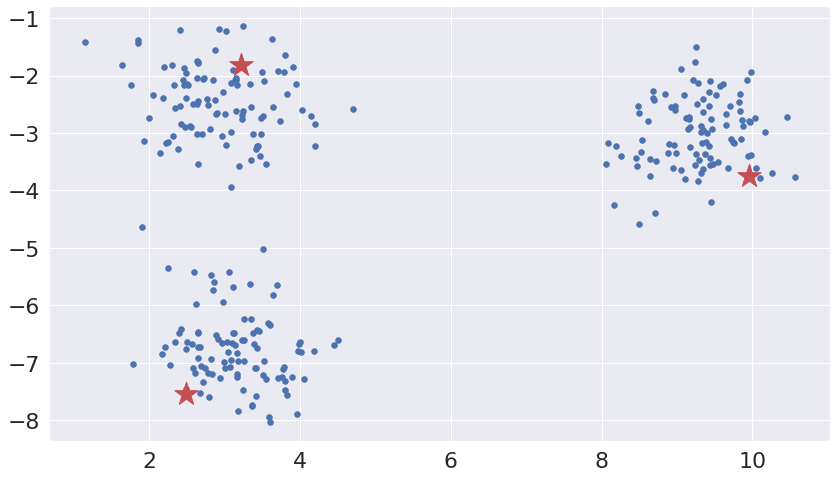

In [ ]:
plt.scatter(X[:, 0], X[:, 1], s=30)
plt.scatter(centers[:,0], centers[:,1], s=600, marker='*', c='r')
ax = plt.gca()


# Encontrando os centróides mais próximos

In [ ]:
closest = model.closest_centroid(centers)
print('Closest centroids:', closest[:10])

Closest centroids: [2 1 2 0 2 2 0 1 1 0]


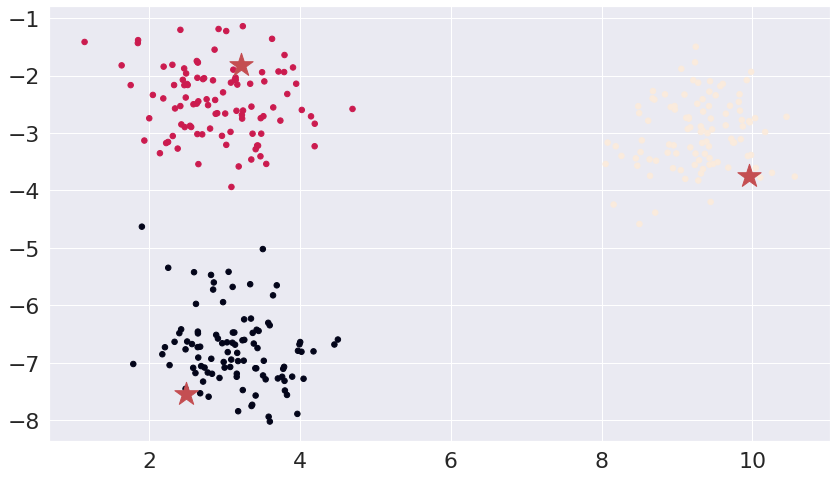

In [ ]:
plt.scatter(X[:, 0], X[:, 1], s=30, c=closest)
plt.scatter(centers[:,0], centers[:,1], s=600, marker='*', c='r')
ax = plt.gca()

# Movendo os centróides

In [ ]:
next_centers = model.move_centroids(centers)
print('Next centroids:', next_centers)

Next centroids: [[ 3.13983912 -6.76543266]
 [ 2.92365933 -2.43822859]
 [ 9.2825366  -3.00889319]]


In [ ]:
clusters, final_centers = model.final_centroids()
print('Final centroids:', final_centers)
print('Clusters points:', clusters[0][0], clusters[1][0], clusters[2][0])

Final centroids: [[ 3.15235452 -6.78700212]
 [ 2.91353216 -2.45992985]
 [ 9.2825366  -3.00889319]]
Clusters points: [ 3.43461737 -6.74321753] [ 3.62798402 -1.36038208] [ 9.44820709 -2.74842197]
